In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 3

### a)

In [91]:
def AdjunctProduct(X):
    (a,b) = X.shape
    total = (X[0:a-1,:]*X[1:a,:]).sum()+(X[:,0:b-1]*X[:,1:b]).sum()
    return total

def U(X):
    (a,b) = X.shape
    return -0.02*((X[0:a-1,:]*X[1:a,:]).sum()+(X[:,0:b-1]*X[:,1:b]).sum())+0.03*X.sum()
    

# Gibbs sampling with Ising Model with parameters fixed as in the question setting
def GibbsSamplingForIsing(m,n,t):
    ''' Input: the dimensions of the lattice space m*n
        t: number of samples
    '''
    ### Initialize the matrix (initial state, to simplify calculation, we use a circle of zeros to surround the data)
    X = np.zeros((m+2,n+2))
    X[1:m+1,1:n+1] = 1
    Sample = []
    for k in range(t):
        for i in range(1,m+1):
            for j in range(1,n+1):
                threshold = 1/(1+np.exp(-0.04*(X[i-1,j] + X[i+1,j] + X[i,j-1]+ X[i,j+1]) + 0.06))
                if np.random.random() < threshold:
                    X[i,j] = 1
                else:
                    X[i,j] = -1
        Sample.append(U(X))

    return np.array(Sample)

In [92]:
# Using Gibbs Sampler calculate the result
SampleOfU = GibbsSamplingForIsing(4,5,10000)
SampleOfU

array([ 0.22, -0.12,  0.28, ...,  0.16,  0.26, -0.12])

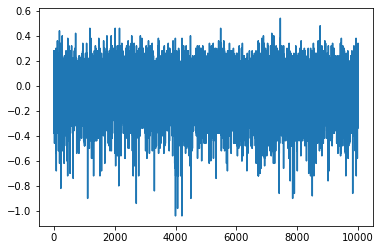

In [93]:
# TracePlot
plt.plot(SampleOfU)

In [94]:
# Drop 10 burn-in periods, we get the estimation result
SampleOfU[100:].mean()

-0.03378181818181818

In [95]:
# Obtain an array of U of every possible x by a recursive algorithm
def traverse(m, n, func):
    '''m*n are dimensions of the random matrix, func is the function of the random matrix '''
    X = np.zeros((m,n))
    # Y is a view of X, the operation on Y will also change X
    Y = X.reshape((m*n,))
    # result list
    List = []
    traversal(X, Y, 0, List, func)
    return List

def traversal(X, Y, i, List, func):
    if i+1 != len(Y):
        Y[i] = 1
        traversal(X, Y, i+1, List, func)
        Y[i] = -1
        traversal(X, Y, i+1, List, func)
    else:
        Y[i] = 1
        List.append(func(X))
        Y[i] = -1
        List.append(func(X))
        

In [96]:
# Obtain the array of U
result = traverse(4,5,U)

In [97]:
# Calculate the exact value of E(U)
uArray = np.array(result)
num = (uArray*np.exp(-uArray)).sum()
denom = (np.exp(-uArray)).sum()
ExactValue = num/denom
ExactValue

-0.03217921501591532

The Exact value is pretty close the to value obtained by MCMC

### b)

In [98]:
# We generate 50000 observations t=50000
GibbsSamplingForIsing(20,20,50000).mean()

-0.7022892